In [ ]:
## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [2]:
df = pd.read_csv("credit_card_default.csv", header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3. Understanding and Cleaning the Dataset

Before performing any analysis or modeling, it is important to understand the structure of the dataset and clean any unnecessary columns. This ensures clarity, interpretability and efficient model training.

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Description

The dataset contains anonymized credit card customer information collected for default prediction analysis. Each row represents an individual customer and the dataset includes demographic details, credit limit information, past payment behavior and bill/payment history.

The target variable in this dataset indicates whether a customer defaulted on their credit payment in the following month.

### Key Variables in the Dataset

- **LIMIT_BAL**: Amount of given credit (credit limit)
- **SEX**: Gender of the customer
- **EDUCATION**: Education level
- **MARRIAGE**: Marital status
- **AGE**: Age of the customer
- **PAY_0 to PAY_6**: History of past payment delays
- **BILL_AMT1 to BILL_AMT6**: Monthly bill amounts
- **PAY_AMT1 to PAY_AMT6**: Amounts paid in previous months
- **default.payment.next.month**: Target variable (1 = Default, 0 = Non-default)

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## 4. Missing Values and Outliers

Handling missing values and outliers is an essential step in data preprocessing as they can significantly affect the performance of machine learning models. In this section, we analyze whether the dataset contains any missing values and examine the presence of outliers in key financial variables.

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### Missing Values Analysis

After examining the dataset, we observe that there are no missing values in any of the variables. This indicates that the dataset is complete and does not require any imputation or row deletion for missing data.

### Outlier Detection

Outliers are extreme values that deviate significantly from the majority of observations. In credit risk datasets, outliers are common and may represent high-value customers or unusual spending behavior. The Interquartile Range (IQR) method is used to identify potential outliers.

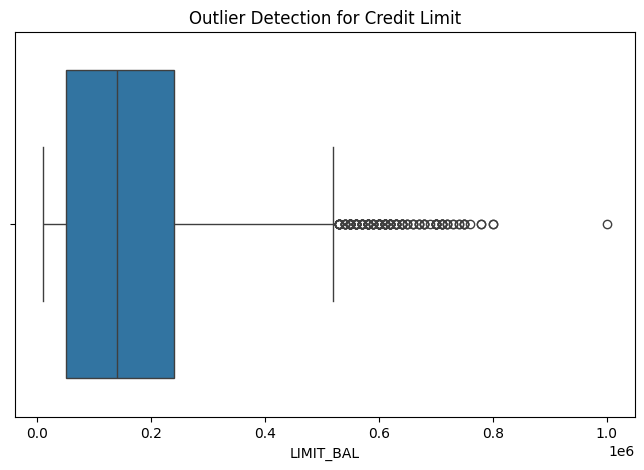

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Outlier Detection for Credit Limit")
plt.show()

In [8]:
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['LIMIT_BAL'] < lower_limit) | (df['LIMIT_BAL'] > upper_limit)]

print(f"Number of potential outliers in LIMIT_BAL: {outliers.shape[0]}")

Number of potential outliers in LIMIT_BAL: 167


From the boxplot and IQR analysis, we observe the presence of outliers in the credit limit variable. However, these values are not removed as high credit limits may correspond to genuinely high-income customers. Removing such observations could result in loss of valuable information. Therefore, outliers are retained for further analysis.

## 5. Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps in understanding how different customer attributes are related to default behavior. This section analyzes key variables that influence credit risk.

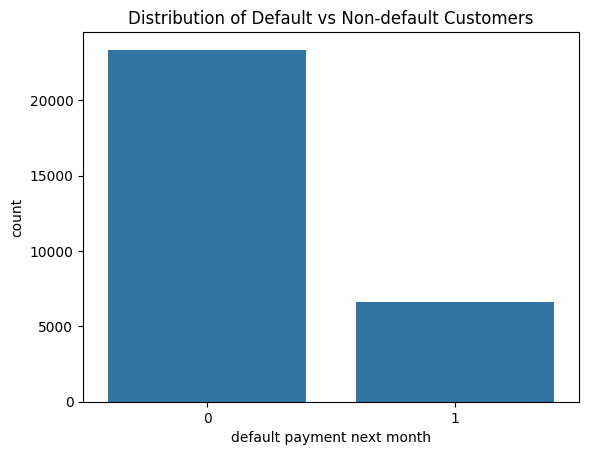

In [9]:
sns.countplot(x='default payment next month', data=df)
plt.title("Distribution of Default vs Non-default Customers")
plt.show()

The dataset is imbalanced with a higher proportion of non-default customers compared to defaulters. This is typical in credit risk datasets and highlights the need for careful model evaluation.

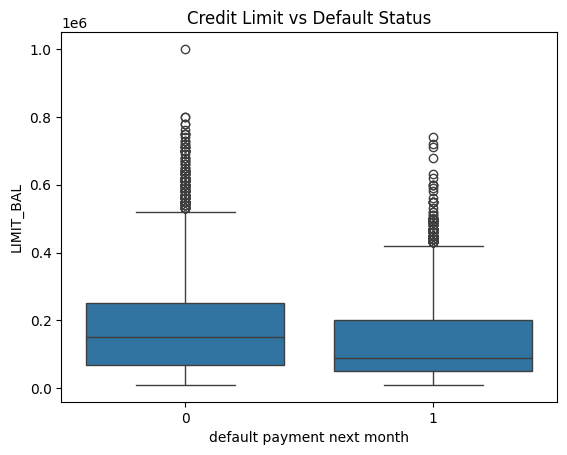

In [10]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title("Credit Limit vs Default Status")
plt.show()

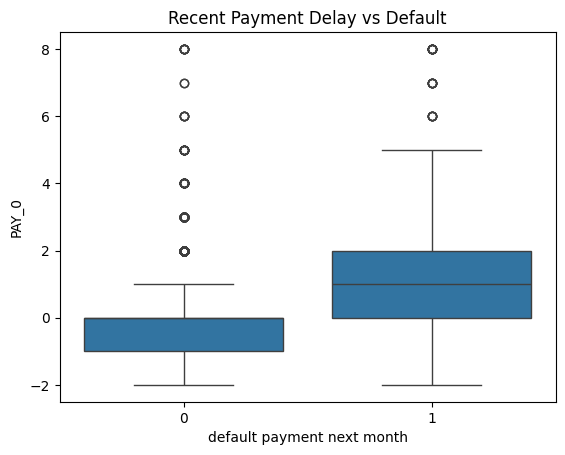

In [11]:
sns.boxplot(x='default payment next month', y='PAY_0', data=df)
plt.title("Recent Payment Delay vs Default")
plt.show()

### EDA Insights

From the exploratory analysis clear differences can be observed between defaulting and non-defaulting customers. Customers who do not default generally have higher credit limits whereas defaulters tend to have relatively lower credit limits. In addition, customers with higher recent payment delays are more likely to default. This indicates that payment history plays a crucial role in assessing credit risk.

## 6. Feature Selection and Train-Test Split

In this step, relevant features are selected for model training and the dataset is divided into training and testing sets to evaluate model performance on unseen data.

In [12]:
X = df.drop(columns=['ID', 'default payment next month'])
y = df['default payment next month']

### Feature Engineering

Feature engineering was carried out to prepare the dataset for effective credit risk modeling while maintaining interpretability.
The customer ID column was removed as it does not contribute to predicting default behavior. All remaining variables capture key aspects such as customer demographics, credit limits, billing amounts and recent repayment history which are directly relevant for assessing credit risk.

To ensure fair model evaluation, the dataset was split into training and testing sets using stratified sampling so that the proportion of defaulters and non-defaulters remains consistent across both sets. Feature scaling was applied for Logistic Regression to account for differences in variable magnitudes while tree-based models were trained on unscaled data since they are not sensitive to feature scale.

In [13]:
X.shape, y.shape

((30000, 23), (30000,))

In [14]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [15]:
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [17]:
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

### Feature Engineering Notes

Basic feature engineering was performed as part of data preprocessing. 
Non-informative variables such as customer ID were removed, and all relevant financial and payment history variables were retained for modeling. 
For Logistic Regression, feature scaling was applied to ensure stable convergence and fair contribution of numeric variables. 
Given the structured nature of the dataset, no additional manual feature construction was performed, allowing the models to learn directly from observed repayment behavior.

## 7. Logistic Regression Model

Logistic Regression is used as a baseline classification model to predict the probability of credit default. 
It is widely used in credit risk modeling due to its interpretability and ability to explain the impact of individual features on default probability.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

> An initial Logistic Regression was attempted without feature scaling.  
> A scaled version is implemented below for final modeling.

### Final Logistic Regression with Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

final_log_model = LogisticRegression(max_iter=2000)
final_log_model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [20]:
y_pred = final_log_model.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8083333333333333

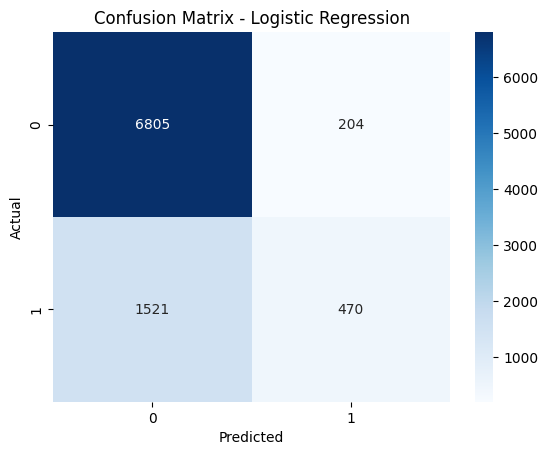

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



The scaled Logistic Regression model shows improved convergence and stable performance.
Payment delay variables contribute strongly to default prediction, reinforcing the importance
of repayment behavior in credit risk assessment.

**Logistic Regression Results Interpretation**

The Logistic Regression model achieves an overall accuracy of around 81% while it performs well in identifying non-defaulting customers, its recall for defaulters is relatively low.
This is expected in imbalanced credit risk datasets and motivates the use of alternative models that can better capture default behavior.

## 8. Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



### Decision Tree – Observations

Compared to Logistic Regression, the Decision Tree model shows an improvement in identifying defaulters as seen from the higher recall for the default class. Although overall accuracy remains similar, the Decision Tree captures complex and non-linear patterns in repayment behavior more effectively. This makes it more suitable for credit risk analysis where identifying risky customers is more important than maximizing accuracy alone.

In [26]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

PAY_0        0.675671
PAY_2        0.138757
PAY_AMT3     0.054643
PAY_5        0.027775
LIMIT_BAL    0.023359
PAY_3        0.017342
BILL_AMT1    0.016880
PAY_6        0.012295
AGE          0.007879
PAY_4        0.006703
dtype: float64

**Feature Importance – Decision Tree**

The feature importance results show that recent payment delays (PAY_0, PAY_2) are the strongest predictors of default followed by repayment amounts and credit limit. This indicates that recent repayment behavior plays a more critical role in default risk than demographic factors which aligns with real-world credit risk assessment practices.

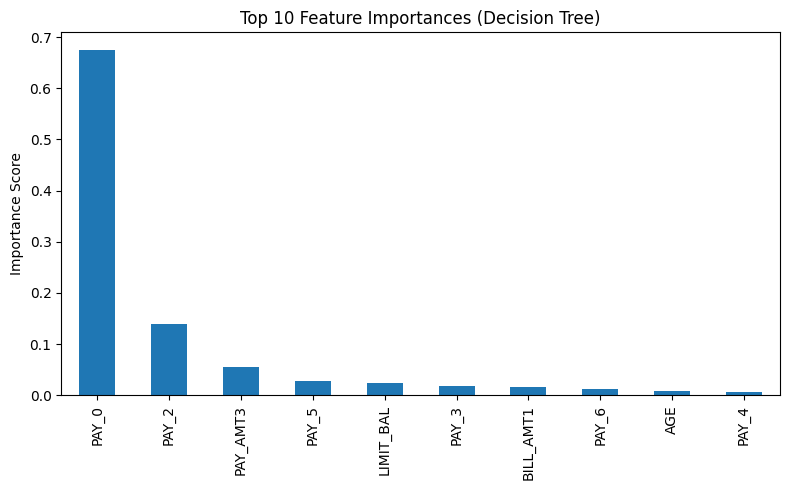

In [27]:
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

## Model Comparison Summary

| Model                | Accuracy | Defaulter Recall |
|---------------------|---------- |------------------|
| Logistic Regression |  81%      | Low              |
| Decision Tree       |  82%      | Improved         |


Logistic Regression serves as a strong and interpretable baseline model. However the Decision Tree demonstrates better performance in identifying defaulters given the objective of credit risk modeling, the Decision Tree provides more practical value despite similar accuracy levels.